# Support Vector Machines

In this section of the assignment, you will get to implement Support Vector Machines which are among the best (and many believe are indeed the best)“off-the-shelf” supervised learning algorithm.

This section is further divided into 3 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the next subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [1]:
import numpy as np
import cvxpy as cp
from cvxpy import *
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,classification_report

### Subsection 1

In [2]:
# Feel free to use this helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

(16, 2) (16,)


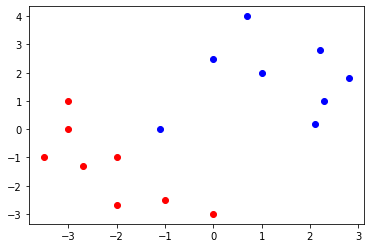

In [3]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

print(X.shape,y.shape)
plot_points(X, y)
plt.show()

In the next cell you are required to derive the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles. Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**

**Note: You cannot use sklearn SVM functions here**

In [4]:
# Write your code here
def kernal_linear(x,y):
    return np.dot(x,y.T)
def kernal_gaussian(x,y,sigma):
    return np.exp(-gamma*linalg.norm(x - y) ** 2 )
def kernal_polynomial(x,y,p=3):
    return (1+np.dot(x,y.T))**p
def kernal_hyperbolictan():
    return np.tanh(np.dot(x,y.T)+1)

## method1

In [5]:
def svm_model(X,y,C,gamma,degree):
    n,m = X.shape
    K = kernal_linear(X,X)
    P = np.dot(y,y.T)*K
    q = -1*np.ones(n).reshape(n,1)
    G1 = -1*np.eye(n,n)    
    h1 = np.zeros(n)
    
    G2 = np.eye(n,n)
    h2 = np.ones(n)*C
    
    #print(G1,"\n",h1,"\n",G2,"\n",h2,"\n")
    A = np.ones(n)*y
    b = 0.0

    x = cp.Variable(n)
    objective = cp.Minimize((1/2)*cp.quad_form(x, P) + q.T@x)
    constraints = [G1@x<=h1,G2@x<=h2 ,A@x==b]
    prob = cp.Problem(objective,constraints)
    prob.solve()
    alpha = x.value
    alpha_pos = alpha[alpha>C]
    sv = X[alpha>C]
    sv_Y = y[alpha>C]

    return alpha,sv,sv_Y,alpha_pos
alpha,sv,sv_y,alpha_pos = svm_model(X,y,1,0.01,4)
print("alpha: \n",alpha)
print("support vetcor :\n",sv)
print("Support vector_y :\n",sv_y)

alpha: 
 [-1.14201380e-22  9.63819899e-01  4.50236050e-22  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  2.85390021e-01  1.01116317e-21  1.00000000e+00  6.78429878e-01
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00]
support vetcor :
 [[-2.7 -1.3]
 [ 0.  -3. ]
 [ 1.   2. ]]
Support vector_y :
 [ 1  1 -1]


In [6]:
y = y.flatten()
w = (y*alpha).T@X
print("weight :\n",w)

x_x = np.matmul(sv,sv.T)
b = np.sum(sv_y - np.sum(x_x*alpha_pos * sv_y, axis=0))
print("bias :\n",b)

weight :
 [-21.15243159 -21.01371951]
bias :
 -19.780000000000005


## Method 2

## hard margin (no slack variable)

In [7]:
def svmHard(X,y):
    n,m=X.shape[0:2]
    w = Variable((m,1))
    b = Variable()
    const = [y[i]*(X[i][0]*w[0]+X[i][1]*w[1]+b)>=1 for i in range(n)]
    prob = Problem(Minimize((1/2)*square(norm(w,2))),const)
    prob.solve()
    print(w.value,b.value)
    return w.value,b.value

In [8]:
# print(np.array(X).shape)
w,b = svmHard(X,y)
w = np.array(w)

[[-1.73913043]
 [-1.30434783]] -2.9130434780347696


In [9]:
y_pred = np.dot(X,w)+b
pos_indx = y_pred>0
neg_indx = y_pred<0 
supp_vect = y_pred=0

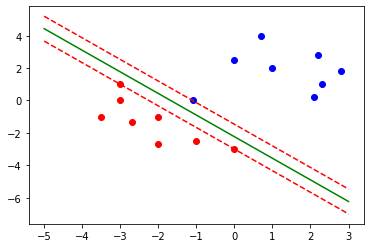

In [10]:
def svm_plot_line(X,y,w,b):
    x = np.linspace(-5, 3, 50)
    plt.plot(x, (-b - (w[0]*x))/w[1] , 'g')
    plt.plot(x, (-b - (w[0]*x)+1)/w[1] ,'r--')
    plt.plot(x, (-b - (w[0]*x)-1)/w[1] , 'r--')
    plot_points(X, y)
    plt.show()
svm_plot_line(X,y,w,b)

## Soft Margin

In [11]:
def svmSoft(X,y,C):
    n,m=X.shape[0:2]
    w = Variable((m,1))
    b = Variable()
    psi = Variable((n,1))
    const1 = [y[i]*(X[i][0]*w[0]+X[i][1]*w[1]+b)+psi[i]>=1 for i in range(n)]
    const2 = [psi[i]>=0 for i in range(n)]
    const = const1 + const2
    prob = Problem(Minimize(0.5*cp.square(cp.norm(w,2))+C*cp.sum(psi)),const)
    prob.solve()
    print(w.value,b.value)
    return w.value,b.value


In [12]:
w,b = svmSoft(X,y,4)


[[-1.73913043]
 [-1.30434783]] -2.913043478073639


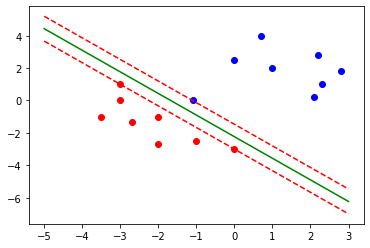

In [13]:
svm_plot_line(X,y,w,b)

In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines

You may want to create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

In the next cell please plot only the support vectors along with the boundary, w vector, and margins. 

**Note: You are not supposed to hard-code the points here**

In [14]:
# Write your code here
svmHard(X,y)  #### this function are created for hard margin in previou cell
svmSoft(X,y,1)  #### this function are created for soft margin in previous cell 

[[-1.73913043]
 [-1.30434783]] -2.9130434780347696
[[-0.73599981]
 [-0.55199986]] -0.6559995709755724


(array([[-0.73599981],
        [-0.55199986]]),
 array(-0.65599957))

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Explain your observations theoretically.

In [15]:
X_ = X
y_ = y
X_ = np.append(X_,[[-4,-10]],axis=0)
X_ = np.append(X_,[[4,4]],axis=0)
y_ = np.append(y_,1)
y_ = np.append(y_,-1)

(18, 2) (18,)


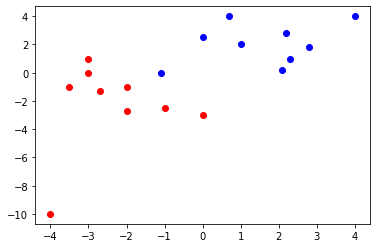

In [16]:
# Re-create the Synthetic Data by adding the points and visualize the points
print(X_.shape,y_.shape)
plot_points(X_, y_)
plt.show()

[[-1.73913043]
 [-1.30434783]] -2.913043478291523
weight matrix: [-1.73913043 -1.30434783]
bias : -2.913043478291523


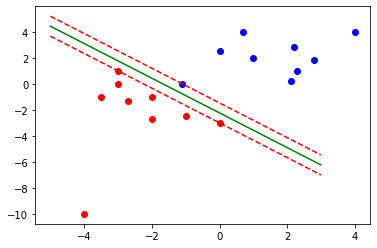

In [17]:
# Solve for the decision boundary using this modified dataset
w,b = svmHard(X_,y_)
w = np.array(w)
w = w.flatten()
print("weight matrix:",w)
print("bias :",b)
svm_plot_line(X_,y_,w,b)

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell**

[[-0.22506809]
 [-0.19858949]] 0.013672204267370152
weight matrix: [-0.22506809 -0.19858949]
bias : 0.013672204267370152


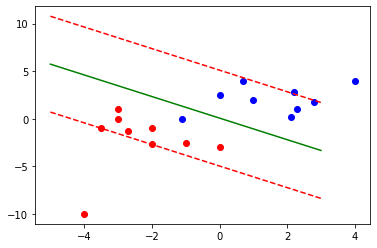

In [18]:
# Write your code here for 
C= 0.01
w,b = svmSoft(X_,y_,C)
w = np.array(w)
w = w.flatten()
print("weight matrix:",w)
print("bias :",b)
svm_plot_line(X_,y_,w,b)

[[-0.38493724]
 [-0.35146444]] -0.12133891201898916
weight matrix: [-0.38493724 -0.35146444]
bias : -0.12133891201898916


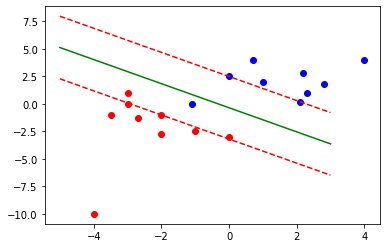

In [19]:
# Write your code here for 
C= 0.1
w,b = svmSoft(X_,y_,C)
w = np.array(w)
w = w.flatten()
print("weight matrix:",w)
print("bias :",b)
svm_plot_line(X_,y_,w,b)

[[-1.73913043]
 [-1.30434783]] -2.9130434782869634
weight matrix: [-1.73913043 -1.30434783]
bias : -2.9130434782869634


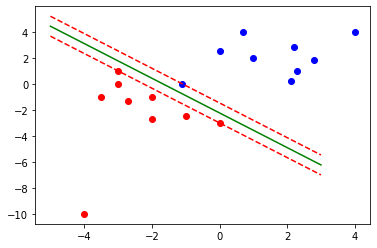

In [20]:
# Write your code here for 
C= 3
w,b = svmSoft(X_,y_,C)
w = np.array(w)
w = w.flatten()
print("weight matrix:",w)
print("bias :",b)
svm_plot_line(X_,y_,w,b)

[[-1.73913043]
 [-1.30434783]] -2.9130434783574235
weight matrix: [-1.73913043 -1.30434783]
bias : -2.9130434783574235


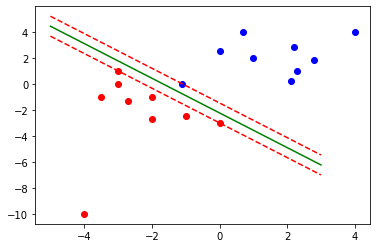

In [21]:
# Write your code here for 
C= 10
w,b = svmSoft(X_,y_,C)
w = np.array(w)
w = w.flatten()
print("weight matrix:",w)
print("bias :",b)
svm_plot_line(X_,y_,w,b)

[[-1.73913044]
 [-1.30434783]] -2.9130434786825745
weight matrix: [-1.73913044 -1.30434783]
bias : -2.9130434786825745


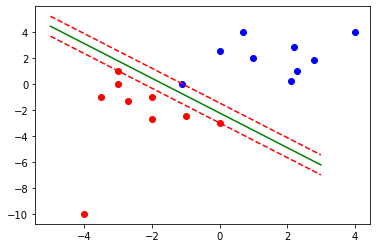

In [23]:
# Write your code here for 
C= 100
w,b = svmSoft(X_,y_,C)
w = np.array(w)
w = w.flatten()
print("weight matrix:",w)
print("bias :",b)
svm_plot_line(X_,y_,w,b)

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion?
Explain why? Show your results by appropriate plots?

[[-0.73599949]
 [-0.55199962]] -0.655998845309311
weight matrix: [-0.73599949 -0.55199962]
bias : -0.655998845309311


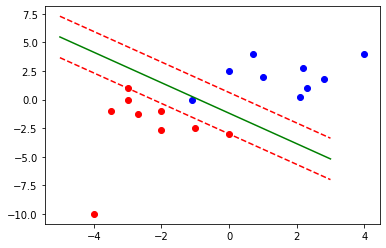

In [24]:
# Write your Code here
C= 1
w,b = svmSoft(X_,y_,C)
w = np.array(w)
w = w.flatten()
print("weight matrix:",w)
print("bias :",b)
svm_plot_line(X_,y_,w,b)

As we see if we change C from 100 to 1 the decision boundary changes ,, because if we increase C value the model predict accuracy on traing data set increases but accuracy on test dataset not much good because due to overfit the data for ex if we check accuracy at C=10000 then no change occur as comare to c=100

[[-1.73913044]
 [-1.30434783]] -2.913043478618098
weight matrix: [-1.73913044 -1.30434783]
bias : -2.913043478618098


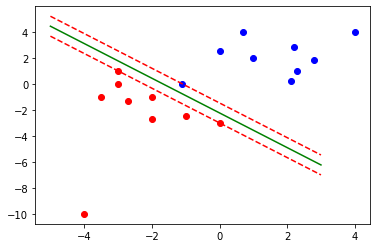

In [25]:
C= 100000
w,b = svmSoft(X_,y_,C)
w = np.array(w)
w = w.flatten()
print("weight matrix:",w)
print("bias :",b)
svm_plot_line(X_,y_,w,b)

Becasue model are best fited one the train dataset , priviously C=0.01 ,0.1,1,3,8 decision boundary changes after taht no change are in decision boudary occur

### Subsection 2

In [ ]:
!pip3 install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

--2021-03-07 19:35:26--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  11.7MB/s    in 0.8s    

2021-03-07 19:35:27 (11.7 MB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2021-03-07 19:35:28--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘samples/train-labels-idx1-ubyte.gz’

train-labels

In [ ]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

print(images_train.shape)
print(labels_train.shape)

(60000, 784)
(60000,)


In [ ]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape)

(10000, 784)
(10000,)


In [ ]:
X_train = []
y_train = []
for i in range(len(images_train)):
  if labels_train[i] == 0 or labels_train[i] == 1 or labels_train[i] == 2:
    X_train.append(images_train[i])
    y_train.append(labels_train[i])
X_train = np.array(X_train)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = np.array(y_train)
print(X_train.shape,y_train.shape) 

(18623, 784) (18623,)


In [ ]:
X_test = []
y_test = []
for i in range(len(images_test)):
  if labels_test[i] == 0 or labels_test[i] == 1 or labels_test[i] == 2:
    X_test.append(images_test[i])
    y_test.append(labels_test[i])
X_test = np.array(X_test)
y_test = np.array(y_test)
scaler = MinMaxScaler()
X_test = scaler.fit_transform(X_test)
print(X_test.shape,y_test.shape)

(3147, 784) (3147,)


- Tweak different parameters like the C Parameter, gamma parameter and kernel of the SVM class and report the results.
- Experiment different kernels for classification and report the results.
Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

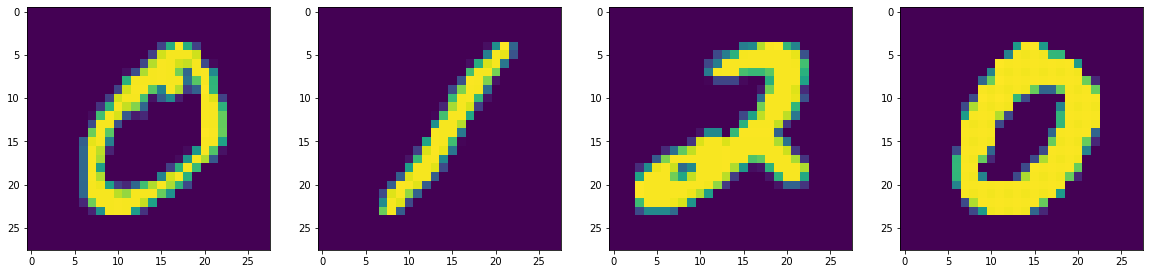

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.subplot(141)
plt.imshow(X_train[0].reshape(28,28))
plt.subplot(142)
plt.imshow(X_train[199].reshape(28,28))
plt.subplot(143)
plt.imshow(X_train[240].reshape(28,28))
plt.subplot(144)
plt.imshow(X_train[590].reshape(28,28))
plt.show()

In [ ]:
def mse(x,y):
  return np.sqrt(np.sum((x-y)**2))/len(x)
def absmerr(x,y):
  return np.sum(abs(x-y))/len(x)

### Linear Kernel

In [ ]:
print("SVM metrices different C values using Linear kernel:")
C_ = np.linspace(1,10,14)
print(C_)
for i in C_:
  clf = SVC(C=i,kernel='linear') 
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print(accuracy_score(y_true=y_test, y_pred=y_pred))

SVM metrices different C values using Linear kernel:
[ 1.          1.69230769  2.38461538  3.07692308  3.76923077  4.46153846
  5.15384615  5.84615385  6.53846154  7.23076923  7.92307692  8.61538462
  9.30769231 10.        ]
0.9853829043533524
0.984429615506832
0.9822052748649508
0.9815697489672705
0.9812519860184302
0.9790276453765491
0.9802986971719098
0.9802986971719098
0.9809342230695901
0.9809342230695901
0.9806164601207499
0.9806164601207499
0.9809342230695901
0.9812519860184302


here we see the max accuracy found on lower value of C

In [ ]:
clf = SVC(C=1,kernel='linear') 
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032

    accuracy                           0.99      3147
   macro avg       0.99      0.99      0.99      3147
weighted avg       0.99      0.99      0.99      3147



### Polynomial kernel

In [ ]:
degree_ = [2,3,4,5,6,7,8,9,10,11]

In [ ]:
print("SVM metrices different Degree values using Polynomial kernel:")
for i in degree_:
  clf = SVC(C=1.0,kernel='poly',degree=i) 
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print("Accuracy with degree",i,"is :",accuracy_score(y_true=y_test, y_pred=y_pred))

SVM metrices different Degree values using Polynomial kernel:
Accuracy with degree 2 is : 0.9945980298697172
Accuracy with degree 3 is : 0.9939625039720369
Accuracy with degree 4 is : 0.9888782967905942
Accuracy with degree 5 is : 0.9771210676835081
Accuracy with degree 6 is : 0.9637750238322211
Accuracy with degree 7 is : 0.952017794725135
Accuracy with degree 8 is : 0.9418493803622497
Accuracy with degree 9 is : 0.926914521766762
Accuracy with degree 10 is : 0.9129329520177947
Accuracy with degree 11 is : 0.8957737527804258


here we see that if we increase the degree the accuracy of madel decreases

In [ ]:
clf = SVC(C=1,kernel='poly',degree=2) 
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032

    accuracy                           0.99      3147
   macro avg       0.99      0.99      0.99      3147
weighted avg       0.99      0.99      0.99      3147



### Radial Basis Function Kernel 

In [ ]:
print("SVM metrices different C and gamma values using RBF kernel:")
gamma_=[0.0001,0.001,0.01,0.1,]
print(gamma_)
for i in gamma_:
  clf = SVC(C=1,kernel='rbf',gamma=i) 
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print(accuracy_score(y_true=y_test, y_pred=y_pred))

SVM metrices different C and gamma values using RBF kernel:
[0.0001, 0.001, 0.01, 0.1]
0.9841118525579917
0.990467111534795
0.9949157928185574
0.9866539561487131


here we see that if increase the gamma value accuracy increase but after some threshold accuracy decreases

In [ ]:
clf = SVC(C=1.0,kernel='rbf',gamma=0.01) 
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032

    accuracy                           0.99      3147
   macro avg       0.99      0.99      0.99      3147
weighted avg       0.99      0.99      0.99      3147



From checking on various hyperparameter like degree , C, gamma and corresponding Kernel ,,we get maximum accuracy which is 0.9949 on the gmma value 0.01 and C = 1.0 